# CCE2503 Search and Optimisation
## Assignment
### Year 2024-2025 - Semester II

* Developed by: Adrian Muscat, 2023
* Minor edits: Johann A. Briffa, 2025

---

### Write your name, ID Card Number and class below.

* Name: Dave Galea
* ID Number: 0283404L
* Class: Computing Science 1st year 

---

## Instructions:

In this assignment you will be looking for a minimiser for the 2D Griewangk
function using the following methods. 

1. Standard Gradient descent
2. Random search
3. Random Search + Gradient descent
4. Simulated annealing

You will also draw convergence plots and compare the methods with each other.

You may be using some of the functions you had developed during the preparatory
stage, e.g. standard gradient descent and python boilerplate code for plotting
contour surfaces, 3D wireframes, timing code, counting function calls etc. 

## Notes: 

1. With the exception of Gradient Descent, for which you shall modify the one in
   the preparatory exercises notebook, program all optimisation algorithms from
   scratch.

2. You can only make use of the python packages included in the notebook in its
   original form, i.e. ('matplotlib.pyplot', 'mpl_toolkits.mplot3d', 'numpy' and
   'time')

3. Cite any blogs, code repositories and/or generative AI tools (e.g. ChatGPT)
   used in completing this assignment. In the case of generative AI tools,
   explain how these tools were used.

4. This work is to be attempted individually. It is essential that the work you
   eventually submit and present for your assignment consists only of your own
   work; use of copied material will be treated as plagiarism. Discussion is
   only permitted on general issues, and it is absolutely forbidden to discuss
   specific details with anyone and/or share results.

5. Please sign the plagiarism form that can be found here:
   https://www.um.edu.mt/ict/students/formsguidelines/

6. Your submission consists of two components:
   * The python notebook, with all cells executed.
   * The signed plagiarism form.

---

## Preparation:

In [76]:
# We first load the required modules
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
import numpy as np
import time
%matplotlib inline

The Griewangk function is:

$G(\mathbf{x}) = 1 + \frac{1}{4000}x_1^2 + \frac{1}{4000}x_2^2 - 
cos(x_1)cos(\frac{\sqrt(2)}{2}x_2)$

In [77]:
# Define objective function to minimize
def Griewangk(x, a=1, b=5):
    """
    Rosenbrock's function is a 2D uni-modal function
    This implementation follows the definition in Kochenderfer & Wheeler, 2019
    x : x is a numpy array of dimensions [2,m], where m is the number of 2D points
    """
    return 1+ x[0]**2/4000 + x[1]**2/4000 - np.cos(x[0])*np.cos(0.5*x[1]*np.sqrt(2))

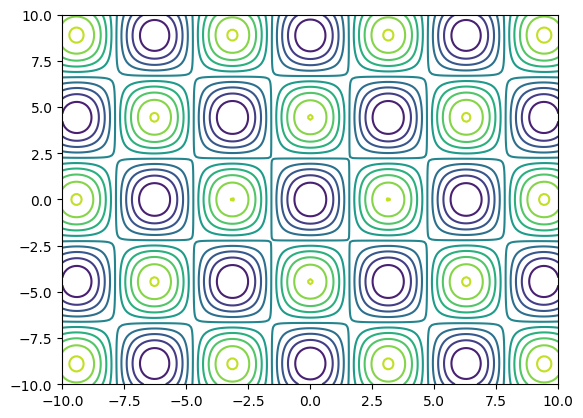

In [78]:
# Plot contour plot in the search space (xmin=-10, ymin=-10), (xmin=10, ymin=10)
N=201
limit=10
xx = np.linspace(-limit, limit, N)
yy = np.linspace(-limit, limit, N)
X = np.repeat(xx,N).reshape(N,N)
Y = np.tile(yy,N).reshape(N,N)
#
x = np.column_stack((X.flatten(),Y.flatten())).T
Z = Griewangk(x).reshape(N,N)
#
plt.contour(X,Y,Z, levels=10)

In [79]:
# Find the location of the minimum value in Z
print(Z.shape)
idx = np.unravel_index(np.argmin(Z, axis=None), Z.shape)
print(idx, '(',X[idx], ', ', Y[idx],')', Z[idx])
print('Therefore global minimum is at (0.0, 0.0)')

(201, 201)
(np.int32(100), np.int32(100)) ( 0.0 ,  0.0 ) 0.0
Therefore global minimum is at (0.0, 0.0)


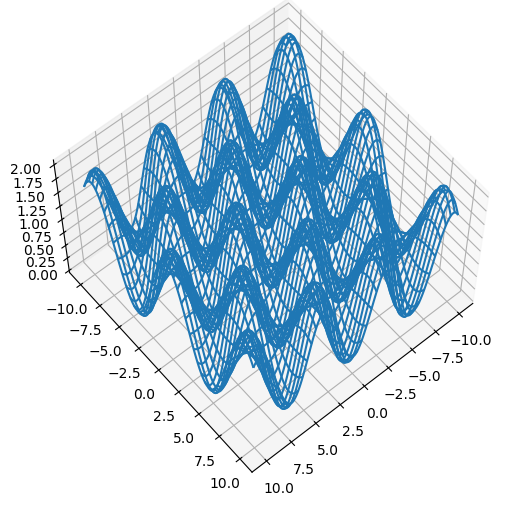

In [80]:
# Plot a 3D wireframe of the objective function
#
fig = plt.figure(figsize=(6, 6))
ax = fig.add_subplot(111, projection='3d')
ax.plot_wireframe(X, Y, Z, rstride=4, cstride=4, cmap=cm.jet)
#ax.plot_wireframe(X, Y, np.log(Z), rstride=2, cstride=2)
#ax.view_init(0, 90) # elevation, azimuth
ax.view_init(60, 50) # elevation, azimuth


---
## Q1

Modify the gradient descent algorithm with the derivate of the $G(\mathbf{x})$ and starting from a random position in the search space $(xmin=-10, ymin=-10), (xmax=10, ymax=10)$, find a minimiser of $G(\mathbf{x})$. 

Execute the process 100 times and plot the average value of $G(\mathbf{x})$ at each iteration. In addition compute the standard deviation of the final values. 

### [15 marks]

Standard deviation of G(x) final values is : 0.09071052869579697
Average value of G(x) at the last iteration is: 0.03140718881929269
Best G(x) found in run 28 is: 0.0000011610,with minimizer coordinates: [0.0000816270, 0.0021508490]


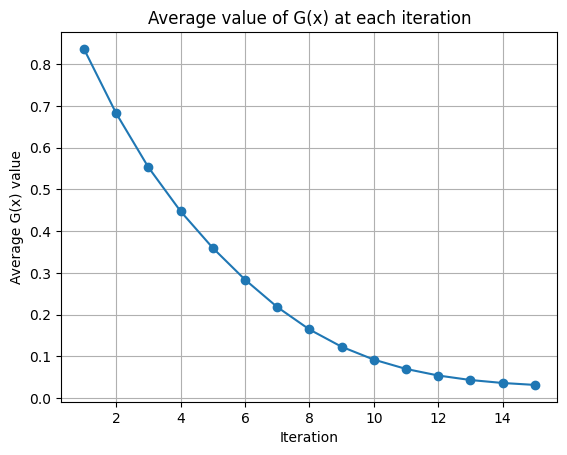

In [81]:
# Definition of Griewangk function pasted from prep
def gwangk(x, a=1, b=5):
    return 1+ x[0]**2/4000 + x[1]**2/4000 - np.cos(x[0])*np.cos(0.5*x[1]*np.sqrt(2))
# Gradient of Grienwangk function 
def g_gwangk(x):
    gradx1 = x[0] / 2000 + np.sin(x[0]) * np.cos((1 / np.sqrt(2)) * x[1])
    gradx2 = x[1] / 2000 + np.cos(x[0]) * np.sin((1 / np.sqrt(2)) * x[1]) * (1 / np.sqrt(2))
    return np.array([gradx1, gradx2]) 


def gradient_descent(alpha = 0.5, N=15, limit=10, runs = 100, x_init = None):#step size adjusted from 0.01 to 0.5
    iter_values = np.zeros((runs, N)) # Generative AI was used for syntax on tracking iterations
    best_gx = float('inf')
    best_run = None
    best_min = None
    
    for run in range(runs):
        if x_init is not None: # modification done so that Q3 can work correctly
            x = x_init.copy()
            
        else:
            x = np.random.uniform(-limit, limit, size=2)
            
        for itr in range(N):
            grad = g_gwangk(x)
            x = x - alpha * grad 
            gwangkval = gwangk(x)
            iter_values[run, itr] = gwangkval
        
        # Finding the Minimizer
        if run == 0 or gwangkval < best_gx:
            best_gx = gwangkval
            best_min = x.copy()
            best_run = run 

    final_iter_vals = iter_values [:, -1] # finding values at final iteration
    std_dev = np.std(final_iter_vals) # Standard deviation of final iteration results
    gx_iter_avg1 = iter_values.mean(axis=0) # Generative AI used for syntax 

    return iter_values, best_gx, best_min, best_run, std_dev, gx_iter_avg1, N

iter_values, best_gx, best_min, best_run, std_dev, gx_iter_avg1, N = gradient_descent()
# Standard deviation calculation
print ("Standard deviation of G(x) final values is :", std_dev)

# Average value of G(x) at each iteration
print("Average value of G(x) at the last iteration is:", gx_iter_avg1[-1])  

# Minimizer
print("Best G(x) found in run %d is: %.10f,with minimizer coordinates: [%.10f, %.10f]"
      % (best_run, best_gx, best_min[0], best_min[1]))

x = range(1, N+1)
y = gx_iter_avg1
plt.plot(x, y, 'o-')
plt.xlabel("Iteration")
plt.ylabel("Average G(x) value")
plt.title("Average value of G(x) at each iteration")
plt.grid(True)
plt.show()

###### ---

## Q2

Implement a random search algorithm  to find a minimiser of $G(\mathbf{x})$ within the search space $(xmin=-10, ymin=-10), (xmax=10, ymax=10)$.

Execute the process 100 times and plot the average value of $G(\mathbf{x})$ at each iteration. In addition compute the standard deviation of the final values. 

### [15 marks]

Standard deviation of G(x) final values is : 0.13400086944574366
Average value of G(x) at the last iteration is: 0.16982326454468535
Best G(x) found in run 60 is: 0.0049606342,with minimizer coordinates: [4.6878504891, 8.3602268282]


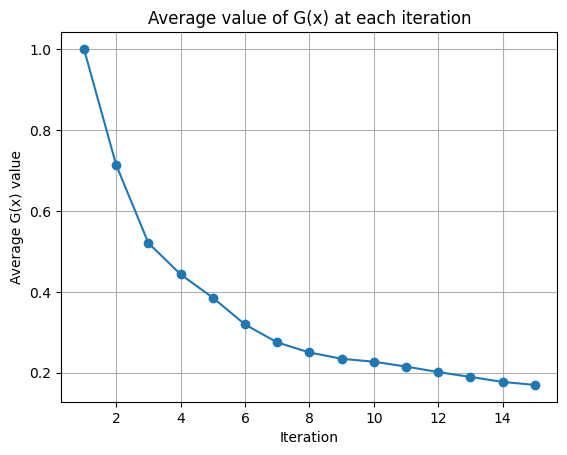

In [82]:
# Definition of Griewangk function pasted from prep
def gwangk(x, a=1, b=5):
    return 1+ x[0]**2/4000 + x[1]**2/4000 - np.cos(x[0])*np.cos(0.5*x[1]*np.sqrt(2))

def random_search(N=15, limit=10, runs=100):
    iter_values = np.zeros((runs, N))
    best_gx = float('inf')
    best_run = None #https://builtin.com/software-engineering-perspectives/define-empty-variables-python
    best_min = None
    
    for run in range(runs):
        x = np.random.uniform(-limit, limit, size=2) # Random starting position 
        best_func_val = float('inf') # syntax from: https://www.geeksforgeeks.org/python-infinity/
        best_x_pos = None
        
        for itr in range(N):
            gwangkval = gwangk(x)
            
            if gwangkval < best_func_val:
                best_func_val = gwangkval
                best_x_pos = x.copy() #copy created to store separate object and not modify best
                                      # position when iteration is re run and gwangkval > best
            iter_values[run, itr] = best_func_val 
            x = np.random.uniform(-limit, limit, size=2) # new random position for next iter
            
            # Finding the minimiser 
            if run == 0 or gwangkval < best_gx: 
                best_gx = gwangkval
                best_min = x.copy()
                best_run = run
        
    final_iter_vals = iter_values [:, -1] # finding values at final iteration
    std_dev = np.std(final_iter_vals) # Standard deviation of final iteration results
    gx_iter_avg2 = iter_values.mean(axis=0) # Generative AI used for syntax 
    
    return iter_values, best_gx, best_min, best_run, std_dev, gx_iter_avg2, N

iter_values, best_gx, best_min, best_run, std_dev, gx_iter_avg2, N = random_search()

# Standard deviation calculation
print ("Standard deviation of G(x) final values is :", std_dev)

#Average value of best so far G(x) at each iteration
print("Average value of G(x) at the last iteration is:", gx_iter_avg2[-1])  

# Minimizer
print("Best G(x) found in run %d is: %.10f,with minimizer coordinates: [%.10f, %.10f]"
      % (best_run, best_gx, best_min[0], best_min[1]))

x = range(1,N+1)
y = gx_iter_avg2
plt.plot(x, y, 'o-')
plt.xlabel("Iteration")
plt.ylabel("Average G(x) value")
plt.title("Average value of G(x) at each iteration")
plt.grid(True)
plt.show()

---

## Q3

Implement a two step approach:

1. In the first step carry out a random search and find minimiser $\mathbf{x}_{initial}^*$, within the search space $(xmin=-10, ymin=-10), (xmax=10, ymax=10)$.
2. In the second step use gradient descent and starting from $\mathbf{x}_{initial}^*$ find minimiser $\mathbf{x}_{final}^*$  within the search space $(xmin=-10, ymin=-10), (xmax=10, ymax=10)$.

Execute the process 100 times and plot the average value of $G(\mathbf{x})$ at each iteration. In addition compute the standard deviation of the final values. 

### [10 marks]



Standard deviation of G(x) final values is : 0.010368660730592706
Average value of G(x) at the last iteration is: 0.01784330849109826
Best G(x) found in run 33 is: 0.0000003969,with minimizer coordinates: [0.0000147953, 0.0012591355]


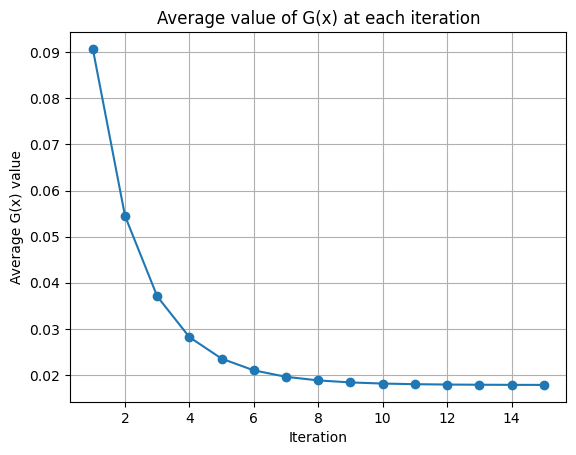

In [83]:
# Definition of Griewangk function pasted from prep
def gwangk(x, a=1, b=5):
    return 1+ x[0]**2/4000 + x[1]**2/4000 - np.cos(x[0])*np.cos(0.5*x[1]*np.sqrt(2))
# Gradient of Grienwangk function 
def g_gwangk(x):
    gradx1 = x[0] / 2000 + np.sin(x[0]) * np.cos((1 / np.sqrt(2)) * x[1])
    gradx2 = x[1] / 2000 + np.cos(x[0]) * np.sin((1 / np.sqrt(2)) * x[1]) * (1 / np.sqrt(2))
    return np.array([gradx1, gradx2]) 

# Random Search (Step 1):
def random_search3(limit, N):
    best_func_val = float('inf')
    best_x_pos = None
    
    for itr in range(N):
        x = np.random.uniform(-limit, limit, size=2) # Random starting position
        gwangkval = gwangk(x)
        
        if gwangkval < best_func_val:
            best_func_val = gwangkval
            best_x_pos = x.copy() #copy created to store separate object and not modify best
                                  # position when iteration is re run and gwangkval > best

    return best_x_pos
    
# Gradient descent (Step 2)
def gradient_descent3(limit, N, x_init, alpha):
    x = x_init.copy()
    iter_values = np.zeros(N)
    for itr in range(N):
        grad = g_gwangk(x)
        x = x - alpha * grad #From equation in notes x^k+1 = x^k + alpha x d^k
        iter_values[itr] = gwangk(x)
    return x, iter_values
    


# Combining the two 
def gradient_random(limit=10, N=15, alpha=0.5, runs=100):
    iter_values = np.zeros((runs, N))
    best_gx = float('inf')
    best_min = None
    best_run = None

    for run in range(runs):
        x_init = random_search3(limit, N)
        x_final, iter_values[run] = gradient_descent3(limit, N, x_init, alpha)
        gwangkval = gwangk(x_final)

        if gwangkval < best_gx:
            best_gx = gwangkval
            best_min = x_final
            best_run = run
    
    final_iter_vals = iter_values [:, -1] # finding values at final iteration
    std_dev = np.std(final_iter_vals) # Standard deviation of final iteration results
    gx_iter_avg3 = iter_values.mean(axis=0) # Generative AI used for syntax 
    
    return iter_values, best_gx, best_min, best_run, std_dev, gx_iter_avg3, N

        
iter_values, best_gx, best_min, best_run, std_dev, gx_iter_avg3, N = gradient_random()
   
# Standard deviation calculation
print ("Standard deviation of G(x) final values is :", std_dev)

#Average value of best so far G(x) at each iteration
print("Average value of G(x) at the last iteration is:", gx_iter_avg3[-1])  

# Minimizer
print("Best G(x) found in run %d is: %.10f,with minimizer coordinates: [%.10f, %.10f]"
      % (best_run, best_gx, best_min[0], best_min[1]))

x = range(1,N+1)
y = gx_iter_avg3
plt.plot(x, y, 'o-')
plt.xlabel("Iteration")
plt.ylabel("Average G(x) value")
plt.title("Average value of G(x) at each iteration")
plt.grid(True)
plt.show()

---

## Q4 

Implement a simulated annealing search algorithm  to find a minimiser of $G(\mathbf{x})$ within the search space $(xmin=-10, ymin=-10), (xmax=10, ymax=10)$.

Execute the process 100 times and plot the average value of $G(\mathbf{x})$ at each iteration. In addition compute the standard deviation of the final values. 

### [30 marks]

Standard deviation of G(x) final values is : 0.46185130011731657
Average value of G(x) at the last iteration is: 0.7503193658218187
Best G(x) found in run 8 is: 0.0000003969,with minimizer coordinates: [3.1543937997, -4.4440811101]


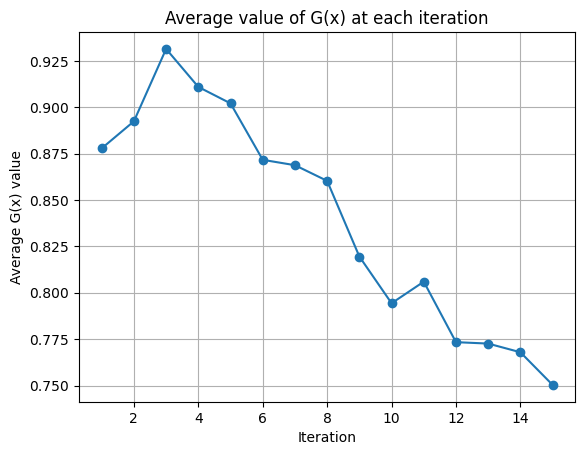

In [84]:
# Definition of Griewangk function pasted from prep
def gwangk(x, a=1, b=5):
    return 1+ x[0]**2/4000 + x[1]**2/4000 - np.cos(x[0])*np.cos(0.5*x[1]*np.sqrt(2))


#initial temp of 10 was used in K&W book, however temp of 5 provided better results with few iterations
def simulated_annealing(limit=10, N=15, init_temp=5, runs=100):
    iter_values = np.zeros((runs, N))# ChatGPT was used for logic on how to track indiv. iterations
    best_min = None
    best_run = None
    gx_best = float('inf')
    x_best = None
    
    for run in range(runs):
        x = np.random.uniform(-limit, limit, 2)
        gwangkval = gwangk(x)
    
        for itr in range(1, N+1): 
            T = init_temp / itr # Using Fast annealing schedule from K&W book 
            x_next = x + np.random.uniform(-1, 1, 2) * T 
            gwangkval_next = gwangk(x_next)
            change_in_val = gwangkval_next - gwangkval
            
            if change_in_val <= 0 or np.random.rand() < np.exp(-change_in_val / T):
                x = x_next
                gwangkval = gwangkval_next
    
            if gwangkval < gx_best:
                gx_best = gwangkval
                x_best = x.copy()
                best_run = run 
                best_min = x_best.copy()
    
            iter_values[run, itr - 1] = gwangkval

            
    final_iter_vals = iter_values [:, -1] # finding values at final iteration
    std_dev = np.std(final_iter_vals) # Standard deviation of final iteration results
    gx_iter_avg4 = iter_values.mean(axis=0) # Generative AI used for syntax

    return iter_values, best_gx, best_min, best_run, std_dev, gx_iter_avg4,  N
    
iter_values, best_gx, best_min, best_run, std_dev, gx_iter_avg4, N = simulated_annealing()
   
# Standard deviation calculation
print ("Standard deviation of G(x) final values is :", std_dev)

#Average value of best so far G(x) at each iteration
print("Average value of G(x) at the last iteration is:", gx_iter_avg4[-1])  

# Minimizer
print("Best G(x) found in run %d is: %.10f,with minimizer coordinates: [%.10f, %.10f]"
      % (best_run, best_gx, best_min[0], best_min[1]))

x = range(1,N+1)
y = gx_iter_avg4
plt.plot(x, y, 'o-')
plt.xlabel("Iteration")
plt.ylabel("Average G(x) value")
plt.title("Average value of G(x) at each iteration")
plt.grid(True)
plt.show()   


---

## Q5

Superimpose all plots from all four optimisation methods and compare the algorithms in terms of rate of convergence, effectiveness and robustness.

### [30 marks]

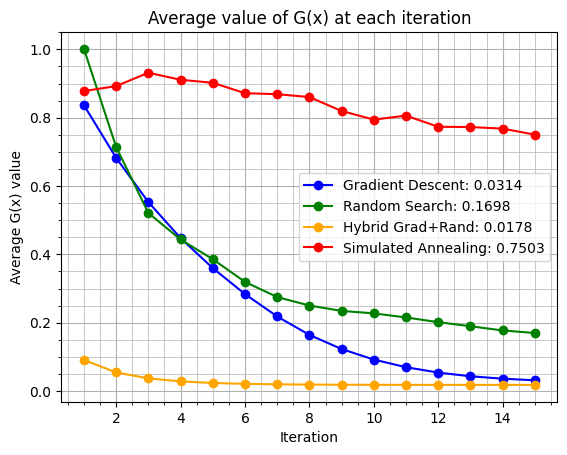

In [85]:
N = 15 # iterations 
x = range(1, N+1) # redefining x 
# To run Q5 correctly, previous questions must be run beforehand
# Plotting gx_itr_avg of respective questions eg: q1 = 1)
iter_final1 = gx_iter_avg1[N-1]
iter_final2 = gx_iter_avg2[N-1]
iter_final3 = gx_iter_avg3[N-1]
iter_final4 = gx_iter_avg4[N-1]

plt.plot(x, gx_iter_avg1, 'o-', color='blue', label=f"Gradient Descent: {iter_final1:.4f}")
plt.plot(x, gx_iter_avg2, 'o-', color='green', label=f"Random Search: {iter_final2:.4f}")
plt.plot(x, gx_iter_avg3, 'o-', color='orange', label=f"Hybrid Grad+Rand: {iter_final3:.4f}")
plt.plot(x, gx_iter_avg4, 'o-', color='red', label=f"Simulated Annealing: {iter_final4:.4f}")


plt.xlabel("Iteration")
plt.ylabel("Average G(x) value")
plt.title("Average value of G(x) at each iteration")

plt.minorticks_on() #https://www.pythoncharts.com/matplotlib/customizing-grid-matplotlib/
plt.grid(which='major', linewidth = 0.8)
plt.grid(which='minor', linewidth = 0.5)

plt.legend()

plt.show()


## Note
In the testing of the below, that besides of robustness, a count of 15 iterations were used for the majority of comparisons. 15 iterations was the count used in the provided gradient_descent algorithm notebook on the VLE, and the number was kept as a baseline for the algorithms. General trends were effectively seen and tested for, as to be described below. 

# Convergence 
To compare the algorithms in terms of convergence, I will be taking the convergence rate as the rate at which the algorithm reaches a point where further iterations stop improving the average G(x) value by much 

In terms of convergence, the hybrid 2 step approach of Random search followed by gradient descent showed the fastest convergence rate, not improving much after around the 5th iteration. 

Gradient descent also converged at around the 13th iteration, with little room for minimization left.

With the limited amount of iterations, Random search and Simulated annealing did not seem to converge, as they both showed room for improvement had the iteration count been higher.


# Effectiveness
To compare the algorithms in terms of effectiveness, I will be basing purely on how much the functions managed to minimize the function given the same amount of iterations.

The hybrid 2 step approach was the most effective algorithm at minimizing the Griewangk function, with gradient descent being extremely close to it. 

Random search implemented on its own had worse results overall than Gradient Descent and The hybrid approach. However, it performed well compared to simulated annealing. 

The poor performance of simulated annealing is likely due to inefficient parameter tuning. Parameters like initial temperature, annealing strategy, and probability of accepting a worse value all greatly affect the performance of the algorithm, and choosing ideal test conditions is not a trivial task. (Ben-Ameur, Computing the initial temperature of simulated annealing 2004)

# Robustness 
To compare the algorithms in terms of robustness, I will be comparing how much a change in parameters affects the outcome of the algorithm 

When tested the algorithms with multiple iteration counts (15, 100, 1000, and 10,000), the algorithms still behaved rather similairly. However, some algorithms changed vastly with different parameters.

Gradient descent had the parameter of step size (alpha). With lower values than 0.5, at 15 iterations, the graph descended almost linearly, thus minimizing the function poorly. At a step size of 2, the function performed the best, nearly identical to the hybrid approach. One may thus state that a larger step size yields a better result, however at a step size of 2<, the function stopped decreasing and instead increased. 

Random search acted fairly similairly across several iteration counts and can therefore be considered quite robust

The hybrid approach, naturally, acted similairly to gradient descent, however started slowing down in terms of rate of convergence past a step size of 1.7<

Simulated annealing, as previously discussed in effectiveness, was the least robust, with any change in one of many parameters present, such as initial temperature, annealing strategy, and probability of accepting a worse value, will greatly impact the result of performance. 

# References 
[1] W. Ben-Ameur, “Computing the initial temperature of simulated annealing,” Computational Optimization and Applications, vol. 29, no. 3, pp. 369–385, Dec. 2004. doi:10.1023/b:coap.0000044187.23143.bd 

